In [81]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.lib.distances import distance_array

def neighbors_distances(universe, cutoff_distance, center_index):
    "Finds carbon neighbors within a cutoff distance."
    center_atom = universe.atoms[center_index]
    if center_atom.name != 'C':
        return []  # Not a carbon atom

    carbon_atoms = universe.select_atoms("name C")  # Select only carbon atoms
    neighbor_atoms = carbon_atoms.select_atoms(f"around {cutoff_distance} index {center_index}")

    neighbors = []
    for atom in neighbor_atoms:
        if atom.index != center_index:  # Exclude the center atom itself
            dist = distance_array(center_atom.position, atom.position).item()  # Extract single value
            neighbors.append(dist)
    print(neighbors)
    
    #print(f"Atom {center_index} has {len(neighbors)} neighbors: {neighbors}")
    return neighbors

# Main:
analized_prote = input("quin fitxer de proteïna vols analitzar? ")
u = mda.Universe(analized_prote)
cutoff_distance = 10
distances_vector = []

print(f"Total atoms: {len(u.atoms)}")

for i in range(10):
    distances_vector.extend(neighbors_distances(u, cutoff_distance, i))

quin fitxer de proteïna vols analitzar?  3ro8.pdb


Total atoms: 23733
[3.2974472081184154, 6.467942649074134, 7.810038220107188, 9.395028301900865, 8.06574741030473, 6.193859975439902, 7.636148705011217, 9.468073556655453, 8.564458060242192, 9.471694054424503, 9.617172419938765, 6.7436173710345475, 6.126070574054734, 8.790996277392532, 8.856157997093469, 7.2466263421575, 9.111691493268223]
[3.2974472081184154, 3.291318956855125, 4.7985268631368125, 6.974023171896617, 8.9816177896959, 8.918757140424376, 9.35341737005423, 9.655367226679138, 9.770322114904872, 7.672222715125555, 7.893291053544148, 8.953050574114156, 9.52352739848674, 8.163594903754921, 6.764723788115324, 8.605973974599502, 8.362290620310677, 5.914963046822401, 7.165023502985081, 9.803520375975584, 9.47237821689284, 8.915482619824093]


In [73]:
print(distances_vector)

[3.0890783223276803, 6.1482593068921245, 9.198068255028087, 9.646221203161575, 7.133045148670089, 5.62404198888078, 6.249912593060854, 8.52457803700506, 3.0890783223276803, 3.1830049510749134, 6.2463043845685915, 8.33405411888597, 7.580141815586792, 5.599458343119689, 5.658620314466943, 6.213675161652433, 8.534509067963015, 6.1482593068921245, 3.1830049510749134, 3.259305294578694, 5.164262454444575, 8.072928639540924, 8.493709134622398, 9.993949317833245, 8.849270288486272, 7.176924562059874, 6.035369696852906, 7.428174256647666, 7.20167907641612, 8.915061477446834, 9.198068255028087, 6.2463043845685915, 3.259305294578694, 3.1116051919778736, 6.200665773688684, 7.576883045666154, 9.932005764729972, 8.922179267593345, 9.953345677684858, 9.040084678982737, 8.608677236244345, 8.478267036915087, 8.33405411888597, 5.164262454444575, 3.1116051919778736, 3.183817471263296, 4.695227544079135, 7.5752985424962995, 7.9281435300458805, 7.361551945226449, 7.0573064630693745, 8.939699494366705, 9.0

In [77]:
def histogram(hist_data, hist_name, save, save_title):
    """
    prints and saves a histogram with the given distribution
    """
    hist_data = np.array(hist_data)
    
    fig, ax = plt.subplots()
    bin_edges = np.linspace(0, cutoff_distance, 41)
    ax.hist(hist_data, bins=bin_edges)
    # plot the xdata locations on the x axis:
    ax.set_ylabel("Nombre de "+ hist_name+" a aquesta distància")
    ax.set_xlabel("Distància")
    plt.title(save_title)
    if save == True:
        plt.savefig(save_title+".png", dpi=1000, bbox_inches='tight')

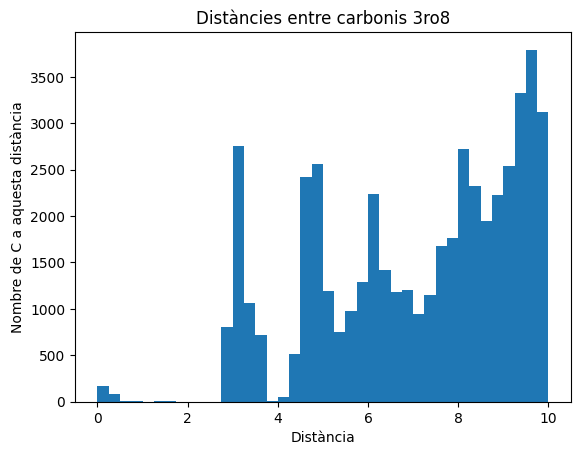

In [78]:
histogram(distances_vector, "C", True, "Distàncies entre carbonis "+analized_prote.removesuffix(".pdb"))